# Encode Data

### Explor data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../Data/laptop_price - dataset.csv')

In [3]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1275 non-null   object 
 1   Product              1275 non-null   object 
 2   TypeName             1275 non-null   object 
 3   Inches               1275 non-null   float64
 4   ScreenResolution     1275 non-null   object 
 5   CPU_Company          1275 non-null   object 
 6   CPU_Type             1275 non-null   object 
 7   CPU_Frequency (GHz)  1275 non-null   float64
 8   RAM (GB)             1275 non-null   int64  
 9   Memory               1275 non-null   object 
 10  GPU_Company          1275 non-null   object 
 11  GPU_Type             1275 non-null   object 
 12  OpSys                1275 non-null   object 
 13  Weight (kg)          1275 non-null   float64
 14  Price (Euro)         1275 non-null   float64
dtypes: float64(4), int64(1), object(10)
me

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Inches,1275.0,15.022902,1.429470,10.10,14.0,15.60,15.60,18.4
CPU_Frequency (GHz),1275.0,2.302980,0.503846,0.90,2.0,2.50,2.70,3.6
RAM (GB),1275.0,8.440784,5.097809,2.00,4.0,8.00,8.00,64.0
Weight (kg),1275.0,2.040525,0.669196,0.69,1.5,2.04,2.31,4.7
Price (Euro),1275.0,1134.969059,700.752504,174.00,609.0,989.00,1496.50,6099.0


In [6]:
df.describe(include='object').T

,count,unique,top,freq
Company,1275,19,Dell,291
Product,1275,618,XPS 13,30
TypeName,1275,6,Notebook,707
ScreenResolution,1275,40,Full HD 1920x1080,505
CPU_Company,1275,3,Intel,1214
CPU_Type,1275,93,Core i5 7200U,193
Memory,1275,39,256GB SSD,412
GPU_Company,1275,4,Intel,704
GPU_Type,1275,106,HD Graphics 620,280
OpSys,1275,9,Windows 10,1048


In [7]:
exchange_rate = 3.97  
df['Price (SAR)'] = df['Price (Euro)'] * exchange_rate
df.drop('Price (Euro)', axis=1, inplace=True)
print(df[['Price (SAR)']].head())

   Price (SAR)
0    5318.5693
1    3568.7918
2    2282.7500
3   10073.6765
4    7160.2920


In [8]:
df['Price (SAR)'].describe().T

count     1275.000000
mean      4505.827164
std       2781.987442
min        690.780000
25%       2417.730000
50%       3926.330000
75%       5941.105000
max      24213.030000
Name: Price (SAR), dtype: float64

In [9]:
df[df['Price (SAR)'] > 13000].count()

Company                11
Product                11
TypeName               11
Inches                 11
ScreenResolution       11
CPU_Company            11
CPU_Type               11
CPU_Frequency (GHz)    11
RAM (GB)               11
Memory                 11
GPU_Company            11
GPU_Type               11
OpSys                  11
Weight (kg)            11
Price (SAR)            11
dtype: int64

### Encdoe Company

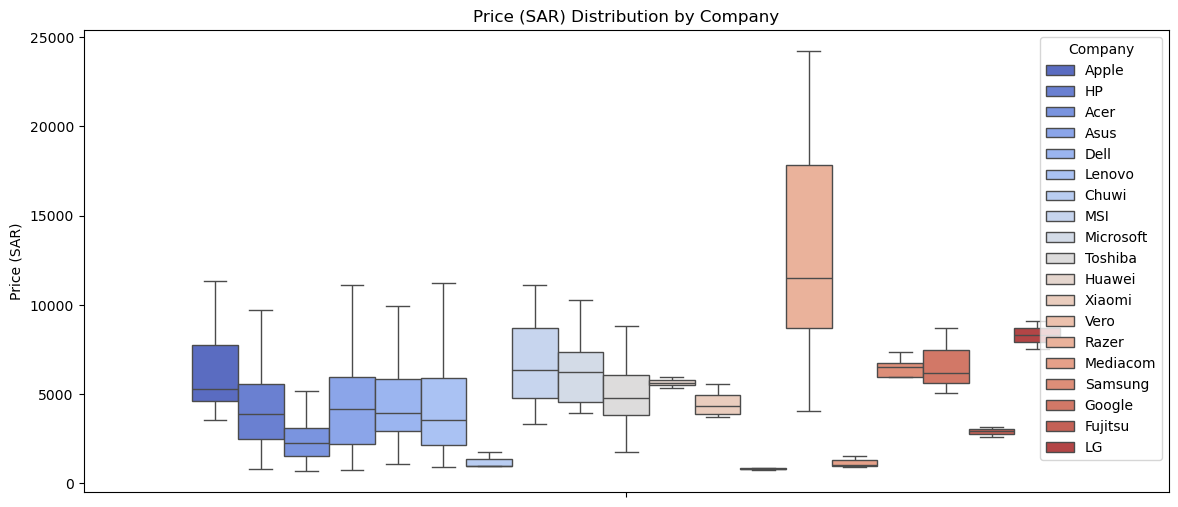

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
sns.boxplot(data=df, hue='Company', y='Price (SAR)', showfliers=False, palette='coolwarm')
plt.xticks(rotation=45)
plt.title("Price (SAR) Distribution by Company")
plt.show()


In [11]:
company_counts = df['Company'].value_counts(normalize=True) * 100
print("Company Frequency (%):\n", company_counts)

Company Frequency (%):
 Company
Dell         22.823529
Lenovo       22.666667
HP           21.019608
Asus         11.921569
Acer          7.921569
MSI           4.235294
Toshiba       3.764706
Apple         1.647059
Samsung       0.705882
Razer         0.549020
Mediacom      0.549020
Microsoft     0.470588
Xiaomi        0.313725
Vero          0.313725
Chuwi         0.235294
Google        0.235294
Fujitsu       0.235294
LG            0.235294
Huawei        0.156863
Name: proportion, dtype: float64


In [12]:
# Group Companies with less than 2% representation as "Other"
rare_companies = company_counts[company_counts < 2].index
df['Company_Grouped'] = df['Company'].replace(rare_companies, 'Other')

# Check new company groups
print(df['Company_Grouped'].value_counts(normalize=True) * 100)


Company_Grouped
Dell       22.823529
Lenovo     22.666667
HP         21.019608
Asus       11.921569
Acer        7.921569
Other       5.647059
MSI         4.235294
Toshiba     3.764706
Name: proportion, dtype: float64


In [13]:
# Calculate mean price for each company group
company_target_mean = df.groupby('Company_Grouped')['Price (SAR)'].mean()

# Map mean prices to the dataframe
df['Company_Encoded'] = df['Company_Grouped'].map(company_target_mean)

# Confirm encoding
print(df[['Company_Grouped', 'Company_Encoded']].head())


  Company_Grouped  Company_Encoded
0           Other      5703.702308
1           Other      5703.702308
2              HP      4288.849217
3           Other      5703.702308
4           Other      5703.702308


In [14]:
df.drop(columns=['Company_Grouped' , 'Company'] , axis=1 , inplace=True)

### Encode Product

In [15]:
len(df['Product'].value_counts())

618

In [16]:
df.Product.sample(10)

635            VivoBook Pro
798          Yoga 910-13IKB
435               Rog Strix
539           Thinkpad E470
887      Rog GL753VD-GC082T
1162    Pavilion 15-cb003nv
1245     Rog GL553VE-FY052T
1250          Inspiron 3552
874              Notebook 9
996       Spectre 13-V111dx
Name: Product, dtype: object

In [17]:
df['Base_Product'] = df['Product'].str.split().str[0]

print(df[['Product', 'Base_Product']].sample(10))

                Product Base_Product
455       Inspiron 3168     Inspiron
1065             XPS 13          XPS
988       Inspiron 5567     Inspiron
758        Alienware 17    Alienware
94      Zenbook UX430UA      Zenbook
526   IdeaPad 320-15IKB      IdeaPad
244      Yoga 910-13IKB         Yoga
165          GE63VR 7RE       GE63VR
239      Nitro AN515-51        Nitro
295   Legion Y720-15IKB       Legion


In [18]:
# Convert Base_Product values to lowercase
df['Base_Product'] = df['Base_Product'].str.lower()

# Get the frequency of Base_Product
product_frequency = df['Base_Product'].value_counts().to_dict()

# Map the frequency to create an encoded column
df['Base_Product_Encoded'] = df['Base_Product'].map(product_frequency)

# Display the results
print(df[['Base_Product', 'Base_Product_Encoded']].head())


  Base_Product  Base_Product_Encoded
0      macbook                    21
1      macbook                    21
2          250                    25
3      macbook                    21
4      macbook                    21


In [19]:
df.drop(columns=['Product' , 'Base_Product'] , axis=1 , inplace=True)

### Encode TypeName

In [20]:
df.TypeName.value_counts()

TypeName
Notebook              707
Gaming                205
Ultrabook             194
2 in 1 Convertible    117
Workstation            29
Netbook                23
Name: count, dtype: int64

In [21]:
# Define ordinal mapping
typename_mapping = {
    'Netbook': 1,
    'Notebook': 2,
    'Ultrabook': 3,
    '2 in 1 Convertible': 4,
    'Gaming': 5,
    'Workstation': 6
}

# Apply ordinal encoding
df['TypeName_Encoded'] = df['TypeName'].map(typename_mapping)

# Check the encoding
print(df[['TypeName', 'TypeName_Encoded']].head())


    TypeName  TypeName_Encoded
0  Ultrabook                 3
1  Ultrabook                 3
2   Notebook                 2
3  Ultrabook                 3
4  Ultrabook                 3


In [22]:
df.drop(columns='TypeName' , axis=1 , inplace=True)

### Encode ScreenResolution

In [23]:
df.ScreenResolution.value_counts()

ScreenResolution
Full HD 1920x1080                                505
1366x768                                         263
IPS Panel Full HD 1920x1080                      226
IPS Panel Full HD / Touchscreen 1920x1080         51
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440                    5
IPS Panel Quad HD+ / Touchscr

In [24]:
# Extract resolution dimensions
df['Resolution_Width'] = df['ScreenResolution'].str.extract(r'(\d+)x')[0].astype(int)
df['Resolution_Height'] = df['ScreenResolution'].str.extract(r'x(\d+)')[0].astype(int)

# Calculate Pixel Area (derived feature)
df['Pixel_Area'] = df['Resolution_Width'] * df['Resolution_Height']

# Check results
df[['ScreenResolution', 'Resolution_Width', 'Resolution_Height', 'Pixel_Area']].head()

,ScreenResolution,Resolution_Width,Resolution_Height,Pixel_Area
0,IPS Panel Retina Display 2560x1600,2560,1600,4096000
1,1440x900,1440,900,1296000
2,Full HD 1920x1080,1920,1080,2073600
3,IPS Panel Retina Display 2880x1800,2880,1800,5184000
4,IPS Panel Retina Display 2560x1600,2560,1600,4096000


In [25]:
# Extract panel type (e.g., IPS Panel, Retina Display)
panel_keywords = ['IPS Panel', 'Retina Display']
for keyword in panel_keywords:
    df[keyword.replace(' ', '_')] = df['ScreenResolution'].str.contains(keyword).astype(int)

# Check results
df[['ScreenResolution', 'IPS_Panel', 'Retina_Display']].head()

,ScreenResolution,IPS_Panel,Retina_Display
0,IPS Panel Retina Display 2560x1600,1,1
1,1440x900,0,0
2,Full HD 1920x1080,0,0
3,IPS Panel Retina Display 2880x1800,1,1
4,IPS Panel Retina Display 2560x1600,1,1


In [26]:
# Create a binary feature for Touchscreen
df['Touchscreen'] = df['ScreenResolution'].str.contains('Touchscreen').astype(int)

# Check results
df[['ScreenResolution', 'Touchscreen']].head()

,ScreenResolution,Touchscreen
0,IPS Panel Retina Display 2560x1600,0
1,1440x900,0
2,Full HD 1920x1080,0
3,IPS Panel Retina Display 2880x1800,0
4,IPS Panel Retina Display 2560x1600,0


In [27]:
df.drop(columns='ScreenResolution' , axis=1 , inplace=True)

### Encode CPU_Company

In [28]:
df.CPU_Company.value_counts()

CPU_Company
Intel      1214
AMD          60
Samsung       1
Name: count, dtype: int64

In [29]:
# One-Hot Encoding
df = pd.get_dummies(df, columns=['CPU_Company'], drop_first=True)

# Check resulting columns
df.head()

,Inches,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (SAR),...,Base_Product_Encoded,TypeName_Encoded,Resolution_Width,Resolution_Height,Pixel_Area,IPS_Panel,Retina_Display,Touchscreen,CPU_Company_Intel,CPU_Company_Samsung
0,13.3,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,5318.5693,...,21,3,2560,1600,4096000,1,1,0,True,False
1,13.3,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,3568.7918,...,21,3,1440,900,1296000,0,0,0,True,False
2,15.6,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,2282.7500,...,25,2,1920,1080,2073600,0,0,0,True,False
3,15.4,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,10073.6765,...,21,3,2880,1800,5184000,1,1,0,True,False
4,13.3,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,7160.2920,...,21,3,2560,1600,4096000,1,1,0,True,False


### Encode CPU_Type

In [30]:
df.CPU_Type.value_counts()

CPU_Type
Core i5 7200U       193
Core i7 7700HQ      147
Core i7 7500U       133
Core i3 6006U        81
Core i7 8550U        73
                   ... 
Core M m3             1
E-Series E2-9000      1
Core M M3-6Y30        1
A6-Series 7310        1
A9-Series 9410        1
Name: count, Length: 93, dtype: int64

In [31]:
# Extract CPU Family (e.g., Core i5, Core i7)
df['CPU_Family'] = df['CPU_Type'].str.extract(r'(Core [iI]\d|A\d|Pentium|Celeron|Xeon|E-Series|Ryzen|Athlon|Core M|Snapdragon|M1)')

# Check results
df[['CPU_Type', 'CPU_Family']].head()

,CPU_Type,CPU_Family
0,Core i5,Core i5
1,Core i5,Core i5
2,Core i5 7200U,Core i5
3,Core i7,Core i7
4,Core i5,Core i5


In [32]:
# Extract CPU Generation (e.g., 7th Gen from 7200U)
df['CPU_Generation'] = df['CPU_Type'].str.extract(r'(\d{4})')[0].str[0] + 'th Gen'

# Check results
print(df[['CPU_Type', 'CPU_Generation']].head())


        CPU_Type CPU_Generation
0        Core i5            NaN
1        Core i5            NaN
2  Core i5 7200U        7th Gen
3        Core i7            NaN
4        Core i5            NaN


In [33]:
# Group rare families as "Other"
rare_families = df['CPU_Family'].value_counts()[df['CPU_Family'].value_counts() < 10].index
df['CPU_Family_Grouped'] = df['CPU_Family'].replace(rare_families, 'Other')

# Check grouped distribution
print(df['CPU_Family_Grouped'].value_counts())


CPU_Family_Grouped
Core i7    515
Core i5    423
Core i3    134
Celeron     78
Pentium     30
Other       23
Core M      17
A9          15
A1          14
A6          11
Name: count, dtype: int64


In [34]:
# One-Hot Encoding for CPU Family
df = pd.get_dummies(df, columns=['CPU_Family_Grouped'], drop_first=True)

# Check results
df.head()

,Inches,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (SAR),...,CPU_Generation,CPU_Family_Grouped_A6,CPU_Family_Grouped_A9,CPU_Family_Grouped_Celeron,CPU_Family_Grouped_Core M,CPU_Family_Grouped_Core i3,CPU_Family_Grouped_Core i5,CPU_Family_Grouped_Core i7,CPU_Family_Grouped_Other,CPU_Family_Grouped_Pentium
0,13.3,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,5318.5693,...,NaN,False,False,False,False,False,True,False,False,False
1,13.3,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,3568.7918,...,NaN,False,False,False,False,False,True,False,False,False
2,15.6,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,2282.7500,...,7th Gen,False,False,False,False,False,True,False,False,False
3,15.4,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,10073.6765,...,NaN,False,False,False,False,False,False,True,False,False
4,13.3,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,7160.2920,...,NaN,False,False,False,False,False,True,False,False,False


In [35]:
df.drop(columns=['CPU_Type', 'CPU_Family', 'CPU_Generation'] , axis=1 , inplace=True)

### Encode Memory

In [36]:
df.Memory.value_counts()

Memory
256GB SSD                        412
1TB HDD                          215
500GB HDD                        124
512GB SSD                        114
128GB SSD +  1TB HDD              94
128GB SSD                         74
256GB SSD +  1TB HDD              73
32GB Flash Storage                36
2TB HDD                           16
512GB SSD +  1TB HDD              14
1TB SSD                           14
64GB Flash Storage                13
256GB SSD +  2TB HDD              10
256GB Flash Storage                8
16GB Flash Storage                 7
1.0TB Hybrid                       7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [37]:
# Extract primary storage capacity and type
df[['Primary_Storage_Capacity', 'Primary_Storage_Type']] = df['Memory'].str.extract(r'(\d+(?:TB|GB)) (SSD|HDD|Flash Storage|Hybrid)')

# Extract secondary storage capacity and type
df[['Secondary_Storage_Capacity', 'Secondary_Storage_Type']] = df['Memory'].str.extract(r'\+ (\d+(?:TB|GB)) (SSD|HDD|Flash Storage|Hybrid)')

# Convert Storage Capacity to Numeric
# Extract numeric values from capacities
df['Primary_Storage_Capacity'] = df['Primary_Storage_Capacity'].str.extract(r'(\d+)').astype(float)
df['Secondary_Storage_Capacity'] = df['Secondary_Storage_Capacity'].str.extract(r'(\d+)').astype(float)

# Convert TB to GB
df.loc[df['Memory'].str.contains('TB'), 'Primary_Storage_Capacity'] *= 1024
df.loc[df['Secondary_Storage_Type'].str.contains('TB', na=False), 'Secondary_Storage_Capacity'] *= 1024

# Fill missing secondary storage with 0
df['Secondary_Storage_Capacity'].fillna(0, inplace=True)

# Calculate Total Storage
df['Total_Storage_GB'] = df['Primary_Storage_Capacity'] + df['Secondary_Storage_Capacity']

# Display results
df[['Memory', 'Primary_Storage_Capacity', 'Primary_Storage_Type', 
          'Secondary_Storage_Capacity', 'Secondary_Storage_Type', 'Total_Storage_GB']].head()

,Memory,Primary_Storage_Capacity,Primary_Storage_Type,Secondary_Storage_Capacity,Secondary_Storage_Type,Total_Storage_GB
0,128GB SSD,128.0,SSD,0.0,NaN,128.0
1,128GB Flash Storage,128.0,Flash Storage,0.0,NaN,128.0
2,256GB SSD,256.0,SSD,0.0,NaN,256.0
3,512GB SSD,512.0,SSD,0.0,NaN,512.0
4,256GB SSD,256.0,SSD,0.0,NaN,256.0


In [38]:
# Apply One-Hot Encoding
df = pd.get_dummies(df, columns=['Primary_Storage_Type', 'Secondary_Storage_Type'], drop_first=True)

# Check the results
df.head()

,Inches,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (SAR),Company_Encoded,...,CPU_Family_Grouped_Core i5,CPU_Family_Grouped_Core i7,CPU_Family_Grouped_Other,CPU_Family_Grouped_Pentium,Primary_Storage_Capacity,Secondary_Storage_Capacity,Total_Storage_GB,Primary_Storage_Type_HDD,Primary_Storage_Type_Hybrid,Primary_Storage_Type_SSD
0,13.3,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,5318.5693,5703.702308,...,True,False,False,False,128.0,0.0,128.0,False,False,True
1,13.3,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,3568.7918,5703.702308,...,True,False,False,False,128.0,0.0,128.0,False,False,False
2,15.6,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,2282.7500,4288.849217,...,True,False,False,False,256.0,0.0,256.0,False,False,True
3,15.4,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,10073.6765,5703.702308,...,False,True,False,False,512.0,0.0,512.0,False,False,True
4,13.3,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,7160.2920,5703.702308,...,True,False,False,False,256.0,0.0,256.0,False,False,True


In [39]:
df.drop(columns='Memory' , axis=1 , inplace=True)

### Encode GPU_Company

In [40]:
df.GPU_Company.value_counts()

GPU_Company
Intel     704
Nvidia    396
AMD       174
ARM         1
Name: count, dtype: int64

In [44]:
df['GPU_Company_Grouped'] = df['GPU_Company'].replace({'ARM': 'Other'})

In [42]:
df = pd.get_dummies(df, columns=['GPU_Company_Grouped'], drop_first=True)

In [45]:
# Target Encoding
gpu_target_mean = df.groupby('GPU_Company_Grouped')['Price (SAR)'].mean()
df['GPU_Company_Encoded'] = df['GPU_Company_Grouped'].map(gpu_target_mean)

# Check encoding
print(df[['GPU_Company_Grouped', 'GPU_Company_Encoded']].head())

  GPU_Company_Grouped  GPU_Company_Encoded
0               Intel          4050.859821
1               Intel          4050.859821
2               Intel          4050.859821
3                 AMD          3088.765410
4               Intel          4050.859821


In [46]:
df.drop(columns=['GPU_Company_Grouped' , 'GPU_Company'], axis=1 , inplace=True)

### Encode GPU_Type

In [47]:
df.GPU_Type.value_counts()

GPU_Type
HD Graphics 620     280
HD Graphics 520     181
UHD Graphics 620     68
GeForce GTX 1050     66
GeForce GTX 1060     48
                   ... 
Graphics 620          1
Radeon R5 520         1
Radeon R7             1
HD Graphics 540       1
Mali T860 MP4         1
Name: count, Length: 106, dtype: int64

In [48]:
# Extract GPU Series (Brand + Model)
df['GPU_Series'] = df['GPU_Type'].str.extract(r'(HD Graphics|UHD Graphics|GeForce GTX|GeForce MX|Radeon|Mali|Quadro)')

# Handle missing values
df['GPU_Series'].fillna('Other', inplace=True)

# Check results
print(df[['GPU_Type', 'GPU_Series']].sample(10))


              GPU_Type    GPU_Series
769    HD Graphics 505   HD Graphics
867    HD Graphics 620   HD Graphics
578   GeForce GTX 1070   GeForce GTX
129   UHD Graphics 620  UHD Graphics
307       GeForce 930M         Other
1041   HD Graphics 400   HD Graphics
692       Quadro M1200        Quadro
925    HD Graphics 520   HD Graphics
1009   HD Graphics 620   HD Graphics
75    GeForce GTX 1050   GeForce GTX


In [49]:
# Group Rare GPU Series (Appear < 5 Times)
gpu_rare_series = df['GPU_Series'].value_counts()[df['GPU_Series'].value_counts() < 5].index
df['GPU_Series_Grouped'] = df['GPU_Series'].replace(gpu_rare_series, 'Other')

# Check new distribution
print(df['GPU_Series_Grouped'].value_counts())


GPU_Series_Grouped
HD Graphics     621
GeForce GTX     236
Radeon          167
Other           131
UHD Graphics     68
Quadro           31
GeForce MX       21
Name: count, dtype: int64


In [50]:
# Frequency Encoding
gpu_frequency = df['GPU_Series_Grouped'].value_counts().to_dict()
df['GPU_Series_Frequency'] = df['GPU_Series_Grouped'].map(gpu_frequency)

# Check results
print(df[['GPU_Series_Grouped', 'GPU_Series_Frequency']].head())


  GPU_Series_Grouped  GPU_Series_Frequency
0              Other                   131
1        HD Graphics                   621
2        HD Graphics                   621
3             Radeon                   167
4              Other                   131


In [51]:
df.drop(columns=['GPU_Type', 'GPU_Series', 'GPU_Series_Grouped'], axis=1 , inplace=True)

### Encode OpSys

In [52]:
df.OpSys.value_counts()

OpSys
Windows 10      1048
No OS             66
Linux             58
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [53]:
# Group Rare Operating Systems
df['OpSys_Grouped'] = df['OpSys'].replace({
    'Windows 10 S': 'Windows',
    'Windows 7': 'Windows',
    'Mac OS X': 'Mac',
    'macOS': 'Mac',
    'Android': 'Other',
    'Chrome OS': 'Other',
    'Linux': 'Other',
    'No OS': 'Other'
})

# Check the new distribution
print(df['OpSys_Grouped'].value_counts())


OpSys_Grouped
Windows 10    1048
Other          153
Windows         53
Mac             21
Name: count, dtype: int64


In [54]:
# Target Encoding for Operating System
opsys_target_mean = df.groupby('OpSys_Grouped')['Price (SAR)'].mean()
df['OpSys_Encoded'] = df['OpSys_Grouped'].map(opsys_target_mean)

# Check results
print(df[['OpSys_Grouped', 'OpSys_Encoded']].head())


  OpSys_Grouped  OpSys_Encoded
0           Mac    6209.868329
1           Mac    6209.868329
2         Other    2353.180654
3           Mac    6209.868329
4           Mac    6209.868329


In [55]:
df.drop(columns=['OpSys', 'OpSys_Grouped'], axis=1 , inplace=True)

In [56]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).drop('Price (SAR)', axis=1).columns

In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

In [58]:
# Standardize numerical features
X_scaled = StandardScaler().fit_transform(df[numerical_columns])

# Calculate VIF
vif_data = pd.DataFrame()
vif_data['Feature'] = numerical_columns
vif_data['VIF'] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]


/home/mana-saleh/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/home/mana-saleh/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


In [59]:
vif_data

,Feature,VIF
0,Inches,4.021415
1,CPU_Frequency (GHz),1.384752
2,RAM (GB),1.863295
3,Weight (kg),4.862251
4,Company_Encoded,1.344386
5,Base_Product_Encoded,1.139011
6,TypeName_Encoded,2.264775
7,Resolution_Width,163.491321
8,Resolution_Height,145.031986
9,Pixel_Area,35.478706


In [60]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Inches,1275.0,1.502290e+01,1.429470e+00,1.010000e+01,1.400000e+01,1.560000e+01,1.560000e+01,1.840000e+01
CPU_Frequency (GHz),1275.0,2.302980e+00,5.038457e-01,9.000000e-01,2.000000e+00,2.500000e+00,2.700000e+00,3.600000e+00
RAM (GB),1275.0,8.440784e+00,5.097809e+00,2.000000e+00,4.000000e+00,8.000000e+00,8.000000e+00,6.400000e+01
Weight (kg),1275.0,2.040525e+00,6.691960e-01,6.900000e-01,1.500000e+00,2.040000e+00,2.310000e+00,4.700000e+00
Price (SAR),1275.0,4.505827e+03,2.781987e+03,6.907800e+02,2.417730e+03,3.926330e+03,5.941105e+03,2.421303e+04
Company_Encoded,1275.0,4.505827e+03,8.200807e+02,2.514854e+03,4.288849e+03,4.342633e+03,4.760924e+03,6.863765e+03
Base_Product_Encoded,1275.0,4.955059e+01,4.391071e+01,1.000000e+00,1.100000e+01,3.800000e+01,9.900000e+01,1.350000e+02
TypeName_Encoded,1275.0,2.890980e+00,1.247241e+00,1.000000e+00,2.000000e+00,2.000000e+00,4.000000e+00,6.000000e+00
Resolution_Width,1275.0,1.900044e+03,4.933462e+02,1.366000e+03,1.920000e+03,1.920000e+03,1.920000e+03,3.840000e+03
Resolution_Height,1275.0,1.073904e+03,2.838839e+02,7.680000e+02,1.080000e+03,1.080000e+03,1.080000e+03,2.160000e+03


## Try model

In [61]:
from sklearn.model_selection import train_test_split

X = df.drop('Price (SAR)', axis=1)
y = df['Price (SAR)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

rf_model = RandomForestRegressor(random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f} SAR")
print(f"R² Score: {r2:.2f}")


Mean Absolute Error (MAE): 688.22 SAR
R² Score: 0.86


In [63]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],              # Number of trees
    'max_depth': [10, 20, 30, 40, None],                    # Tree depth
    'min_samples_split': [2, 5, 10, 15],                   # Min samples to split
    'min_samples_leaf': [1, 2, 4, 8],                      # Min samples at leaf
    'max_features': ['sqrt', 'log2'],              # Max features to consider
    'bootstrap': [True, False]                             # Use bootstrapping
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           cv=5, scoring='r2',  n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")


Best Parameters: {'bootstrap': False, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}


In [64]:
best_rf = grid_search.best_estimator_

y_pred = best_rf.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"📊 Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f} SAR")
print(f"R² Score: {r2:.2f}")


📊 Evaluation Metrics:
Mean Absolute Error (MAE): 657.16 SAR
R² Score: 0.89


In [65]:
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostRegressor

catboost_model = CatBoostRegressor(
    random_state=42, 
    silent=True, 
    task_type="CPU",  # Use CPU only
    thread_count=-1,  # Use all available CPU cores
    early_stopping_rounds=50  # Stop if performance stalls
)

param_grid = {
    'iterations': [1000 , 1500], 
    'learning_rate': [0.01, 0.05 , 0.001],  
    'depth': [6 , 8 , 10], 
    'l2_leaf_reg': [3, 5], 
    'bagging_temperature': [1, 2],  
    'random_strength': [0.1, 0.5] 
}

grid_search = GridSearchCV(
    estimator=catboost_model,
    param_grid=param_grid, 
    cv=5, scoring='r2', 
    n_jobs=-1
)

grid_search.fit(X_train, y_train)


/home/mana-saleh/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostRegressor object at 0x736d5df66450>,
             n_jobs=-1,
             param_grid={'bagging_temperature': [1, 2], 'depth': [6, 8, 10],
                         'iterations': [1000, 1500], 'l2_leaf_reg': [3, 5],
                         'learning_rate': [0.01, 0.05, 0.001],
                         'random_strength': [0.1, 0.5]},
             scoring='r2')

In [66]:
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

Best Parameters: {'bagging_temperature': 1, 'depth': 6, 'iterations': 1000, 'l2_leaf_reg': 3, 'learning_rate': 0.05, 'random_strength': 0.1}


In [67]:
best_catboost = grid_search.best_estimator_

y_pred = best_catboost.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"📊 Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f} SAR")
print(f"R² Score: {r2:.2f}")

📊 Evaluation Metrics:
Mean Absolute Error (MAE): 634.85 SAR
R² Score: 0.88


In [68]:
# Best Parameters: {'random_strength': 0.5, 'learning_rate': 0.05, 'l2_leaf_reg': 5, 'iterations': 1000, 'depth': 6, 'bagging_temperature': 1}
import joblib
grid_search.best_estimator_.save_model("../Models/catboost_best_model.cbm")
joblib.dump(X_test, "../Data/X_test_enocde.pkl")


['../Data/X_test_enocde.pkl']

In [87]:
# Remove rows where Price (SAR) > 13000
df_cleaned = df[df['Price (SAR)'] <= 10000]

In [88]:
X = df_cleaned.drop('Price (SAR)', axis=1)
y = df_cleaned['Price (SAR)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [98]:
best_params = {
    'bagging_temperature': 1,
    'depth': 6,
    'iterations': 1000,
    'l2_leaf_reg': 3,
    'learning_rate': 0.05,
    'random_strength': 0.1,
    'random_state': 42,
    'silent': True,
    'task_type': "CPU",  # Use CPU only
    'thread_count': -1,  # Use all available CPU cores
    'early_stopping_rounds': 50  # Stop if performance stalls
}

catboost_model = CatBoostRegressor(**best_params)

catboost_model.fit(X_train, y_train)

In [99]:
y_pred = catboost_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error (MAE): 576.48
R² Score: 0.86


In [100]:
catboost_model.save_model("../Models/catboost_final_model.cbm")

In [102]:
X_test.columns

Index(['Inches', 'CPU_Frequency (GHz)', 'RAM (GB)', 'Weight (kg)',
       'Company_Encoded', 'Base_Product_Encoded', 'TypeName_Encoded',
       'Resolution_Width', 'Resolution_Height', 'Pixel_Area', 'IPS_Panel',
       'Retina_Display', 'Touchscreen', 'CPU_Company_Intel',
       'CPU_Company_Samsung', 'CPU_Family_Grouped_A6', 'CPU_Family_Grouped_A9',
       'CPU_Family_Grouped_Celeron', 'CPU_Family_Grouped_Core M',
       'CPU_Family_Grouped_Core i3', 'CPU_Family_Grouped_Core i5',
       'CPU_Family_Grouped_Core i7', 'CPU_Family_Grouped_Other',
       'CPU_Family_Grouped_Pentium', 'Primary_Storage_Capacity',
       'Secondary_Storage_Capacity', 'Total_Storage_GB',
       'Primary_Storage_Type_HDD', 'Primary_Storage_Type_Hybrid',
       'Primary_Storage_Type_SSD', 'GPU_Company_Grouped_Intel',
       'GPU_Company_Grouped_Nvidia', 'GPU_Company_Grouped_Other',
       'GPU_Company_Encoded', 'GPU_Series_Frequency', 'OpSys_Encoded'],
      dtype='object')

In [103]:
df_cleaned.to_csv('../Data/data_cleaned_v1.csv')